In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import joblib


### Load dataset

In [2]:
# Load dataset
df = pd.read_csv('crop_yield_data.csv')
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


### Preprocess data

In [3]:
# Preprocess the data in X and y for his use
X = df.drop('crop_yield', axis=1).values
y = df['crop_yield'].values
print(f'Shapes:\n- X:{X.shape}\n- y:{y.shape}')

Shapes:
- X:(3000, 5)
- y:(3000,)


In [4]:
# Code column soil quality index
# labelEncoder1 = LabelEncoder()
# X[:, 1] = labelEncoder1.fit_transform(X[:, 1])
# columnTransformer1 = ColumnTransformer(transformers=[("onehot1", OneHotEncoder(), [1])], 
#                                       remainder="passthrough")

# Code column sunlight 
# labelEncoder3 = LabelEncoder()
# X[:, 3] = labelEncoder3.fit_transform(X[:, 3])
# columnTransformer3 = ColumnTransformer(transformers=[("onehot3", OneHotEncoder(), [3])], 
#                                       remainder="passthrough")
# X

In [5]:
# Scale the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
# Train set, test set and validation set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

print(f'Shapes:\n- Train: {X_train.shape, y_train.shape}\n- Test: {X_test.shape, y_test.shape}')

Shapes:
- Train: ((2400, 5), (2400,))
- Test: ((600, 5), (600,))


In [7]:
# Check distribution of the data train
df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
df_train

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg
0,0.048000,0.888889,0.958586,1.000,0.120690
1,0.469333,0.888889,0.109091,0.625,0.590000
2,0.892667,0.111111,0.710101,0.250,0.612069
3,0.597333,0.888889,0.111111,0.250,0.550345
4,0.531333,0.333333,0.507071,0.375,0.635862
...,...,...,...,...,...
2395,0.248667,0.222222,0.598990,0.375,0.590000
2396,0.963333,1.000000,0.662626,0.750,0.505517
2397,0.920000,0.777778,0.637374,0.500,0.477241
2398,0.121333,0.000000,0.313131,0.000,0.872759


In [8]:
# Check distribution of the data test
df_test = pd.DataFrame(X_test, columns=df.columns[:-1])
df_test.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.527058,0.496481,0.480662,0.512083,0.490097
std,0.292915,0.318226,0.281765,0.335083,0.284323
min,0.003333,0.000000,0.000000,0.000000,0.000000
25%,0.269000,0.222222,0.232323,0.250000,0.253276
50%,0.550667,0.555556,0.463131,0.500000,0.471207
75%,0.789333,0.777778,0.723990,0.875000,0.731810
max,0.999333,1.000000,0.996970,1.000000,1.000000


# Decision Tree regressor

### Fit model

In [9]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

# Metrics

In [10]:
mse = mean_squared_error(y_test, regressor.predict(X_test))
mae = mean_absolute_error(y_test, regressor.predict(X_test))
r2 = r2_score(y_test, regressor.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 120.22
Valor MAE: 8.78
Valor R2: 0.99


# Linear Regression

### Fit model

In [11]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
mse = mean_squared_error(y_test, linear.predict(X_test))
mae = mean_absolute_error(y_test, linear.predict(X_test))
r2 = r2_score(y_test, linear.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 0.09
Valor MAE: 0.25
Valor R2: 1.00


# Lasso

In [13]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [14]:
mse = mean_squared_error(y_test, lasso.predict(X_test))
mae = mean_absolute_error(y_test, lasso.predict(X_test))
r2 = r2_score(y_test, lasso.predict(X_test))
print(f"Valor MSE: {mse:.2f}\nValor MAE: {mae:.2f}\nValor R2: {r2:.2f}")

Valor MSE: 49.64
Valor MAE: 5.59
Valor R2: 1.00


### Save model

In [15]:
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(linear, initial_types=initial_type)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [22]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

<Axes: xlabel='Test', ylabel='Predict'>

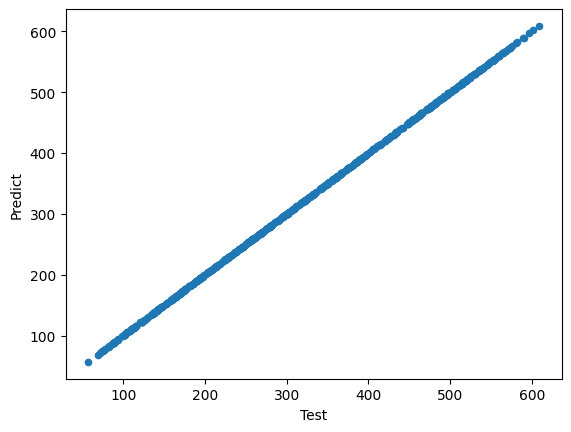

In [16]:
y_pred = linear.predict(X_test)
df_pred = pd.DataFrame({"Test":y_test, "Predict":y_pred})
df_pred.plot(kind='scatter', x='Test', y='Predict')

In [17]:
df_pred

,Test,Predict
0,137,136.686501
1,249,248.848631
2,352,352.413752
3,306,305.794990
4,244,244.063821
...,...,...
595,441,441.523422
596,258,258.205305
597,548,547.779264
598,360,359.814031


In [18]:
df_pred.describe()

,Test,Predict
count,600.000000,600.000000
mean,321.796667,321.826222
std,141.227100,141.227111
min,57.000000,56.603627
25%,196.750000,196.842972
50%,318.500000,318.544588
75%,450.000000,449.569503
max,609.000000,609.154866


In [19]:


# df = pd.DataFrame({'test': [datos], 'pred': [datos]})

# Crear el modelo de regresión
model = LinearRegression()

# Ajustar el modelo
model.fit(df_pred[['Test']], df_pred['Predict'])

# Coeficientes
intercept, slope = model.intercept_, model.coef_[0]
print(f"La ecuación de la regresión es y = {slope:.4f}x + {intercept:.4f}")


La ecuación de la regresión es y = 1.0000x + 0.0302
